In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("test.csv")
df2 = pd.read_csv("train.csv")

In [3]:
df1.shape

(418, 11)

In [4]:
df2.shape

(891, 12)

In [5]:
df = pd.concat([df1,df2], sort=False)

In [6]:
df.shape

(1309, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
df.PassengerId.value_counts()

892    1
443    1
461    1
460    1
459    1
      ..
18     1
17     1
16     1
15     1
891    1
Name: PassengerId, Length: 1309, dtype: int64

In [9]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [10]:
df['ismale'] = np.where(df['Sex'] == "male", 1, 0)

In [11]:
df.drop(columns='Sex', inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
 10  Survived     891 non-null    float64
 11  ismale       1309 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 127.8+ KB


In [13]:
df.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
D                  4
                  ..
B80                1
B4                 1
A32                1
C49                1
C148               1
Name: Cabin, Length: 186, dtype: int64

In [14]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [15]:
df = pd.get_dummies(df, columns=['Embarked'])
#df.drop(columns='Embarked', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Survived     891 non-null    float64
 10  ismale       1309 non-null   int32  
 11  Embarked_C   1309 non-null   uint8  
 12  Embarked_Q   1309 non-null   uint8  
 13  Embarked_S   1309 non-null   uint8  
dtypes: float64(3), int32(1), int64(4), object(3), uint8(3)
memory usage: 121.4+ KB


In [16]:
df.sample(7)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,ismale,Embarked_C,Embarked_Q,Embarked_S
326,327,3,"Nysveen, Mr. Johan Hansen",61.0,0,0,345364,6.2375,NaN,0.0,1,0,0,1
153,1045,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",36.0,0,2,350405,12.1833,NaN,NaN,0,0,0,1
231,232,3,"Larsson, Mr. Bengt Edvin",29.0,0,0,347067,7.7750,NaN,0.0,1,0,0,1
188,1080,3,"Sage, Miss. Ada",NaN,8,2,CA. 2343,69.5500,NaN,NaN,0,0,0,1
148,149,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",36.5,0,2,230080,26.0000,F2,0.0,1,0,0,1
776,777,3,"Tobin, Mr. Roger",NaN,0,0,383121,7.7500,F38,0.0,1,0,1,0
80,972,3,"Boulos, Master. Akar",6.0,1,1,2678,15.2458,NaN,NaN,1,1,0,0


In [17]:
#df = df.astype(float)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

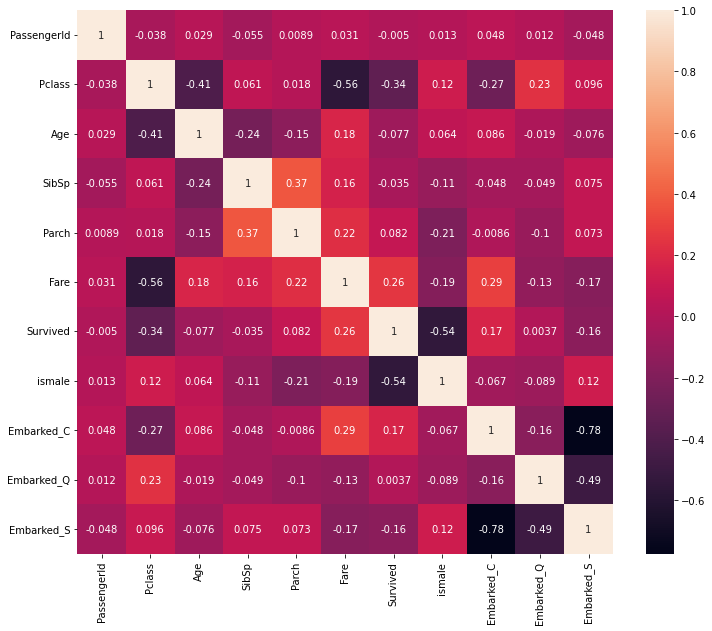

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)

In [20]:
df.Age.value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
60.5     1
76.0     1
67.0     1
22.5     1
74.0     1
Name: Age, Length: 98, dtype: int64

In [21]:
df.Age.median()

28.0

In [22]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [23]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [24]:
df[['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,39.159930
2,29.506705
3,24.816367


In [25]:
df[['SibSp', 'Age']].groupby('SibSp').mean()

,Age
SibSp,
0,30.921766
1,31.058071
2,23.569444
3,16.312500
4,8.772727
5,10.166667
8,14.500000


In [26]:
pclass_age = df.groupby('Pclass').Age.transform('median')
df.Age.fillna(pclass_age, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Survived     891 non-null    float64
 10  ismale       1309 non-null   int32  
 11  Embarked_C   1309 non-null   uint8  
 12  Embarked_Q   1309 non-null   uint8  
 13  Embarked_S   1309 non-null   uint8  
dtypes: float64(3), int32(1), int64(4), object(3), uint8(3)
memory usage: 121.4+ KB


In [28]:
df.Ticket.value_counts()

CA. 2343      11
CA 2144        8
1601           8
PC 17608       7
347082         7
              ..
2677           1
A./5. 2152     1
7546           1
349253         1
370376         1
Name: Ticket, Length: 929, dtype: int64

In [29]:
a = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
li = []
for i in df.Ticket:
    k = ''
    for j in i:
        if j in a:
            k+=j
    li.append(k)
len(k)

6

In [30]:
df['New'] = li

In [31]:
df.New.value_counts()

2343      11
2144       8
1601       8
14879      7
347077     7
          ..
52152      1
7546       1
349253     1
330958     1
370376     1
Name: New, Length: 924, dtype: int64

In [32]:
df.sample(10)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,ismale,Embarked_C,Embarked_Q,Embarked_S,New
163,164,3,"Calic, Mr. Jovo",17.0,0,0,315093,8.6625,NaN,0.0,1,0,0,1,315093
65,66,3,"Moubarek, Master. Gerios",24.0,1,1,2661,15.2458,NaN,1.0,1,1,0,0,2661
387,388,2,"Buss, Miss. Kate",36.0,0,0,27849,13.0000,NaN,1.0,0,0,0,1,27849
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",41.0,0,2,370129,20.2125,NaN,0.0,0,0,0,1,370129
218,1110,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",50.0,1,1,113503,211.5000,C80,NaN,0,1,0,0,113503
671,672,1,"Davidson, Mr. Thornton",31.0,1,0,F.C. 12750,52.0000,B71,0.0,1,0,0,1,12750
876,877,3,"Gustafsson, Mr. Alfred Ossian",20.0,0,0,7534,9.8458,NaN,0.0,1,0,0,1,7534
57,949,3,"Abelseth, Mr. Olaus Jorgensen",25.0,0,0,348122,7.6500,F G63,NaN,1,0,0,1,348122
805,806,3,"Johansson, Mr. Karl Johan",31.0,0,0,347063,7.7750,NaN,0.0,1,0,0,1,347063
295,1187,3,"Angheloff, Mr. Minko",26.0,0,0,349202,7.8958,NaN,NaN,1,0,0,1,349202


In [33]:
df.rename(columns={'New':'Ticket_int'}, inplace=True)

In [34]:
df.Ticket_int = np.where(df.Ticket_int == '', 0, df.Ticket_int)

In [35]:
df = df.astype({'Ticket_int':float})

In [36]:
df.Ticket_int.value_counts()

2343.0      11
2144.0       8
1601.0       8
14879.0      7
347077.0     7
            ..
52152.0      1
7546.0       1
349253.0     1
330958.0     1
370376.0     1
Name: Ticket_int, Length: 924, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Survived     891 non-null    float64
 10  ismale       1309 non-null   int32  
 11  Embarked_C   1309 non-null   uint8  
 12  Embarked_Q   1309 non-null   uint8  
 13  Embarked_S   1309 non-null   uint8  
 14  Ticket_int   1309 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(3), uint8(3)
memory usage: 131.7+ KB


In [38]:
df.drop(columns='Ticket', inplace=True)

In [39]:
df.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
D                  4
                  ..
B80                1
B4                 1
A32                1
C49                1
C148               1
Name: Cabin, Length: 186, dtype: int64

In [40]:
df.Cabin.fillna('Z', inplace=True)

In [41]:
def getchar(new):
    return new[0]

In [42]:
df.Cabin = df.Cabin.map(lambda x: getchar(x))

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1308 non-null   float64
 7   Cabin        1309 non-null   object 
 8   Survived     891 non-null    float64
 9   ismale       1309 non-null   int32  
 10  Embarked_C   1309 non-null   uint8  
 11  Embarked_Q   1309 non-null   uint8  
 12  Embarked_S   1309 non-null   uint8  
 13  Ticket_int   1309 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(2), uint8(3)
memory usage: 121.4+ KB


In [44]:
df.drop(columns='Name', inplace=True)

In [45]:
df.Survived.fillna(-1, inplace=True)

In [46]:
train = df[df.Survived != -1]

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    object 
 7   Survived     891 non-null    float64
 8   ismale       891 non-null    int32  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
 12  Ticket_int   891 non-null    float64
dtypes: float64(4), int32(1), int64(4), object(1), uint8(3)
memory usage: 75.7+ KB


In [48]:
test = df[df.Survived == -1]

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Cabin        418 non-null    object 
 7   Survived     418 non-null    float64
 8   ismale       418 non-null    int32  
 9   Embarked_C   418 non-null    uint8  
 10  Embarked_Q   418 non-null    uint8  
 11  Embarked_S   418 non-null    uint8  
 12  Ticket_int   418 non-null    float64
dtypes: float64(4), int32(1), int64(4), object(1), uint8(3)
memory usage: 35.5+ KB


In [50]:
df.Cabin.value_counts()

Z    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [51]:
df['Cabin_int'] = np.where(df.Cabin == 'A', 1, 
                   np.where(df.Cabin == 'B', 2, 
                   np.where(df.Cabin == 'C', 3, 
                   np.where(df.Cabin == 'D', 4, 
                   np.where(df.Cabin == 'E', 5, 
                   np.where(df.Cabin == 'F', 6,
                   np.where(df.Cabin == 'G', 7, 0)))))))

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Age          1309 non-null   float64
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Fare         1308 non-null   float64
 6   Cabin        1309 non-null   object 
 7   Survived     1309 non-null   float64
 8   ismale       1309 non-null   int32  
 9   Embarked_C   1309 non-null   uint8  
 10  Embarked_Q   1309 non-null   uint8  
 11  Embarked_S   1309 non-null   uint8  
 12  Ticket_int   1309 non-null   float64
 13  Cabin_int    1309 non-null   int32  
dtypes: float64(4), int32(2), int64(4), object(1), uint8(3)
memory usage: 116.3+ KB


In [53]:
df.Cabin_int.dtype

dtype('int32')

In [54]:
df = df.astype({'Cabin_int':float})

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Age          1309 non-null   float64
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Fare         1308 non-null   float64
 6   Cabin        1309 non-null   object 
 7   Survived     1309 non-null   float64
 8   ismale       1309 non-null   int32  
 9   Embarked_C   1309 non-null   uint8  
 10  Embarked_Q   1309 non-null   uint8  
 11  Embarked_S   1309 non-null   uint8  
 12  Ticket_int   1309 non-null   float64
 13  Cabin_int    1309 non-null   float64
dtypes: float64(5), int32(1), int64(4), object(1), uint8(3)
memory usage: 121.4+ KB


In [56]:
df.Fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
26.2833     1
7.1417      1
8.6542      1
34.6542     1
10.5167     1
Name: Fare, Length: 281, dtype: int64

In [57]:
df.Fare.fillna(8, inplace=True)

In [58]:
df.drop(columns='Cabin', inplace=True)

# AI / ML

In [59]:
train = df[df.Survived != -1]

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Survived     891 non-null    float64
 7   ismale       891 non-null    int32  
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
 11  Ticket_int   891 non-null    float64
 12  Cabin_int    891 non-null    float64
dtypes: float64(5), int32(1), int64(4), uint8(3)
memory usage: 75.7 KB


In [61]:
test = df[df.Survived == -1].astype(float)

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    float64
 1   Pclass       418 non-null    float64
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    float64
 4   Parch        418 non-null    float64
 5   Fare         418 non-null    float64
 6   Survived     418 non-null    float64
 7   ismale       418 non-null    float64
 8   Embarked_C   418 non-null    float64
 9   Embarked_Q   418 non-null    float64
 10  Embarked_S   418 non-null    float64
 11  Ticket_int   418 non-null    float64
 12  Cabin_int    418 non-null    float64
dtypes: float64(13)
memory usage: 45.7 KB


In [63]:
test.drop(columns='Survived', inplace=True)

In [64]:
x = train.drop(columns='Survived').astype(float)

In [65]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Pclass       891 non-null    float64
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    float64
 4   Parch        891 non-null    float64
 5   Fare         891 non-null    float64
 6   ismale       891 non-null    float64
 7   Embarked_C   891 non-null    float64
 8   Embarked_Q   891 non-null    float64
 9   Embarked_S   891 non-null    float64
 10  Ticket_int   891 non-null    float64
 11  Cabin_int    891 non-null    float64
dtypes: float64(12)
memory usage: 90.5 KB


In [66]:
y = train.Survived

In [67]:
y.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(712, 12) (712,)
(179, 12) (179,)


In [69]:
print(np.mean(y_test))
print(np.mean(y_train))

0.3854748603351955
0.38342696629213485


In [70]:
def get_csv(model, test, ans_name):
    prediction = model.predict(test)
    
    prediction_ans = []
    for i in prediction:
        if i < 0.5:
            prediction_ans.append(0)
        else:
            prediction_ans.append(1)
            
    prediction = pd.DataFrame(prediction_ans)
    ans = pd.concat([test.PassengerId, prediction], axis=1).astype(int)
    ans.rename(columns={0:'Survived'}, inplace=True)
    ans.to_csv(ans_name, index=False)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression(random_state=1)

In [74]:
model.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [75]:
model.score(x_test, y_test)

0.6145251396648045

In [76]:
prediction_1 = model.predict(test)

In [77]:
k = 0
for i in prediction_1:
    if i == 0:
        k+=1
print(k)

418


In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
model_1 = LinearRegression()

In [80]:
new_x_train = x_train[['PassengerId', 'Pclass', 'ismale', 'Cabin_int']]
new_x_train.sample(5)

,PassengerId,Pclass,ismale,Cabin_int
243,244.0,3.0,1.0,0.0
636,637.0,3.0,1.0,0.0
333,334.0,3.0,1.0,0.0
416,417.0,2.0,0.0,0.0
256,257.0,1.0,0.0,0.0


In [81]:
model_1.fit(x_train[['PassengerId', 'Pclass', 'ismale', 'Cabin_int']], y_train)

LinearRegression()

In [82]:
model_1.score(x_test[['PassengerId', 'Pclass', 'ismale', 'Cabin_int']], y_test)

0.4253929691481212

In [83]:
prediction_1 = model_1.predict(test[['PassengerId', 'Pclass', 'ismale', 'Cabin_int']])

In [84]:
prediction_2 = []
for i in prediction_1:
    if i < 0.5:
        prediction_2.append(0)
    else:
        prediction_2.append(1)

In [85]:
len(prediction_2)
prediction_2

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


In [86]:
prediction_2 = pd.DataFrame(prediction_2)

In [87]:
ans_1 = pd.concat([test.PassengerId, prediction_2], axis=1).astype(int)

In [88]:
ans_1.rename(columns={0:'Survived'}, inplace=True)

In [89]:
ans_1.sample(5)

,PassengerId,Survived
221,1113,0
67,959,0
169,1061,1
232,1124,0
383,1275,1
